# Building a model to predict the classification of income either > 50k or < 50k , so here we have two classifications yes/No OR 0 OR 1.
#Used the given dataset and applied Logistic Regression and KNN Classifier 
And observed there is around 83 accurate OR around 17% of error with both training and test dataset.

In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics, model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [228]:
import warnings
warnings.filterwarnings('ignore')

#Reading the data from data file

In [248]:
census_data = pd.read_csv("E:/DataScience/ThomsonReuters/adult_train.txt", header=None)
census_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Adding column header by giving the columns names from the names file to the dataframe as it is not having header in the data file.

In [249]:
census_data.columns = ["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation",
             "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [250]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Most of the coulumns in the dataframe are objects type and we need to convert in to int types, so we are creating the Dummy variables to the dataframe

In [251]:
income_dummies = pd.get_dummies(census_data.income, prefix='income')
income_dummies.sample(n=5, random_state=1)

,income_ <=50K,income_ >50K
9646,1,0
709,1,0
7385,0,1
16671,1,0
21932,1,0


In [252]:
income_dummies.drop(income_dummies.columns[0], axis=1, inplace=True)
income_dummies.sample(n=5, random_state=1)

,income_ >50K
9646,0
709,0
7385,1
16671,0
21932,0


In [253]:
census_data = pd.concat([census_data, income_dummies], axis=1)
census_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_ >50K
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K,0
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K,0
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K,1
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K,0
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K,0


In [254]:
sex_dummies = pd.get_dummies(census_data.sex, prefix='sex')
sex_dummies.sample(n=5, random_state=1)

,sex_ Female,sex_ Male
9646,1,0
709,0,1
7385,0,1
16671,0,1
21932,1,0


In [255]:
sex_dummies.drop(sex_dummies.columns[0], axis=1, inplace=True)
sex_dummies.sample(n=5, random_state=1)

,sex_ Male
9646,0
709,1
7385,1
16671,1
21932,0


In [256]:
census_data = pd.concat([census_data, sex_dummies], axis=1)
census_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_ >50K,sex_ Male
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,0,0,66,United-States,<=50K,0,0
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,0,0,25,United-States,<=50K,0,1
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,27828,0,50,United-States,>50K,1,1
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K,0,1
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0


In [257]:
race_dummies = pd.get_dummies(census_data.race, prefix='race')
census_data = pd.concat([census_data, race_dummies], axis=1)
census_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,income,income_ >50K,sex_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,...,66,United-States,<=50K,0,0,0,0,0,0,1
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,...,25,United-States,<=50K,0,1,0,0,0,0,1
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,...,50,United-States,>50K,1,1,0,0,0,0,1
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,40,United-States,<=50K,0,1,0,0,0,0,1
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,...,40,United-States,<=50K,0,0,0,0,0,0,1


In [258]:
marital_status_dummies = pd.get_dummies(census_data['marital-status'], prefix='ms')
census_data = pd.concat([census_data, marital_status_dummies], axis=1)
census_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,race_ Black,race_ Other,race_ White,ms_ Divorced,ms_ Married-AF-spouse,ms_ Married-civ-spouse,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,...,0,0,1,0,0,0,0,0,0,1
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,...,0,0,1,0,0,0,0,1,0,0
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,...,0,0,1,0,0,0,0,1,0,0
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,1,0,0,1,0,0,0,0
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,...,0,0,1,0,0,0,0,1,0,0


In [259]:
relationship_dummies = pd.get_dummies(census_data['relationship'], prefix='rel')
census_data = pd.concat([census_data, relationship_dummies], axis=1)
census_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed,rel_ Husband,rel_ Not-in-family,rel_ Other-relative,rel_ Own-child,rel_ Unmarried,rel_ Wife
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,...,0,0,0,1,0,1,0,0,0,0
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,...,0,1,0,0,0,0,1,0,0,0
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,...,0,1,0,0,0,0,0,1,0,0
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,0,0,1,0,0,0,0,0
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,...,0,1,0,0,0,0,0,0,1,0


In [260]:
workclass_dummies = pd.get_dummies(census_data['workclass'], prefix='wc')
census_data = pd.concat([census_data, workclass_dummies], axis=1)
census_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,rel_ Wife,wc_ ?,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay
9646,62,Self-emp-not-inc,26911,7th-8th,4,Widowed,Other-service,Not-in-family,White,Female,...,0,0,0,0,0,0,0,1,0,0
709,18,Private,208103,11th,7,Never-married,Other-service,Other-relative,White,Male,...,0,0,0,0,0,1,0,0,0,0
7385,25,Private,102476,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,...,0,0,0,0,0,1,0,0,0,0
16671,33,Private,511517,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,0,0,0,1,0,0,0,0
21932,36,Private,292570,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,1,0,0,0,0


In [261]:
df = census_data.loc[:,~census_data.columns.duplicated()]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,rel_ Wife,wc_ ?,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,1,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,1,0,0,0,0,1,0,0,0,0


In [262]:
pd.reset_option('max_columns')
pd.set_option('display.max_colwidth', 4000)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,rel_ Wife,wc_ ?,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,1,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,1,0,0,0,0,1,0,0,0,0


In [265]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_ >50K', 'sex_ Male', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'ms_ Divorced', 'ms_ Married-AF-spouse', 'ms_ Married-civ-spouse',
       'ms_ Married-spouse-absent', 'ms_ Never-married', 'ms_ Separated',
       'ms_ Widowed', 'rel_ Husband', 'rel_ Not-in-family',
       'rel_ Other-relative', 'rel_ Own-child', 'rel_ Unmarried', 'rel_ Wife',
       'wc_ ?', 'wc_ Federal-gov', 'wc_ Local-gov', 'wc_ Never-worked',
       'wc_ Private', 'wc_ Self-emp-inc', 'wc_ Self-emp-not-inc',
       'wc_ State-gov', 'wc_ Without-pay'],
      dtype='object')

In [266]:
income_df = df[["age","education-num","workclass","occupation","hours-per-week","sex_ Male","race_ Asian-Pac-Islander","race_ Amer-Indian-Eskimo","race_ Black","race_ White","ms_ Divorced", "ms_ Married-AF-spouse", "ms_ Married-civ-spouse",
       "ms_ Married-spouse-absent", "ms_ Never-married", "ms_ Separated",
       "ms_ Widowed","rel_ Not-in-family", "rel_ Other-relative", "rel_ Own-child",
       "rel_ Unmarried", "wc_ Federal-gov",
       "wc_ Local-gov", "wc_ Never-worked", "wc_ Private", "wc_ Self-emp-inc",
       "wc_ Self-emp-not-inc", "wc_ State-gov", "wc_ Without-pay","income_ >50K"]]
income_df.head()

,age,education-num,workclass,occupation,hours-per-week,sex_ Male,race_ Asian-Pac-Islander,race_ Amer-Indian-Eskimo,race_ Black,race_ White,...,rel_ Unmarried,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay,income_ >50K
0,39,13,State-gov,Adm-clerical,40,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,Self-emp-not-inc,Exec-managerial,13,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,Private,Handlers-cleaners,40,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,53,7,Private,Handlers-cleaners,40,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,28,13,Private,Prof-specialty,40,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [267]:
income_df.describe()

,age,education-num,hours-per-week,sex_ Male,race_ Asian-Pac-Islander,race_ Amer-Indian-Eskimo,race_ Black,race_ White,ms_ Divorced,ms_ Married-AF-spouse,...,rel_ Unmarried,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay,income_ >50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456,0.669205,0.031909,0.009551,0.095943,0.854274,0.136452,0.000706,...,0.105832,0.029483,0.064279,0.000215,0.697030,0.034274,0.078038,0.039864,0.000430,0.240810
std,13.640433,2.572720,12.347429,0.470506,0.175761,0.097264,0.294518,0.352837,0.343273,0.026569,...,0.307627,0.169159,0.245254,0.014661,0.459549,0.181935,0.268236,0.195642,0.020731,0.427581
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,45.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        32561 non-null  int64 
 1   education-num              32561 non-null  int64 
 2   workclass                  32561 non-null  object
 3   occupation                 32561 non-null  object
 4   hours-per-week             32561 non-null  int64 
 5   sex_ Male                  32561 non-null  uint8 
 6   race_ Asian-Pac-Islander   32561 non-null  uint8 
 7   race_ Amer-Indian-Eskimo   32561 non-null  uint8 
 8   race_ Black                32561 non-null  uint8 
 9   race_ White                32561 non-null  uint8 
 10  ms_ Divorced               32561 non-null  uint8 
 11  ms_ Married-AF-spouse      32561 non-null  uint8 
 12  ms_ Married-civ-spouse     32561 non-null  uint8 
 13  ms_ Married-spouse-absent  32561 non-null  uint8 
 14  ms_ Ne

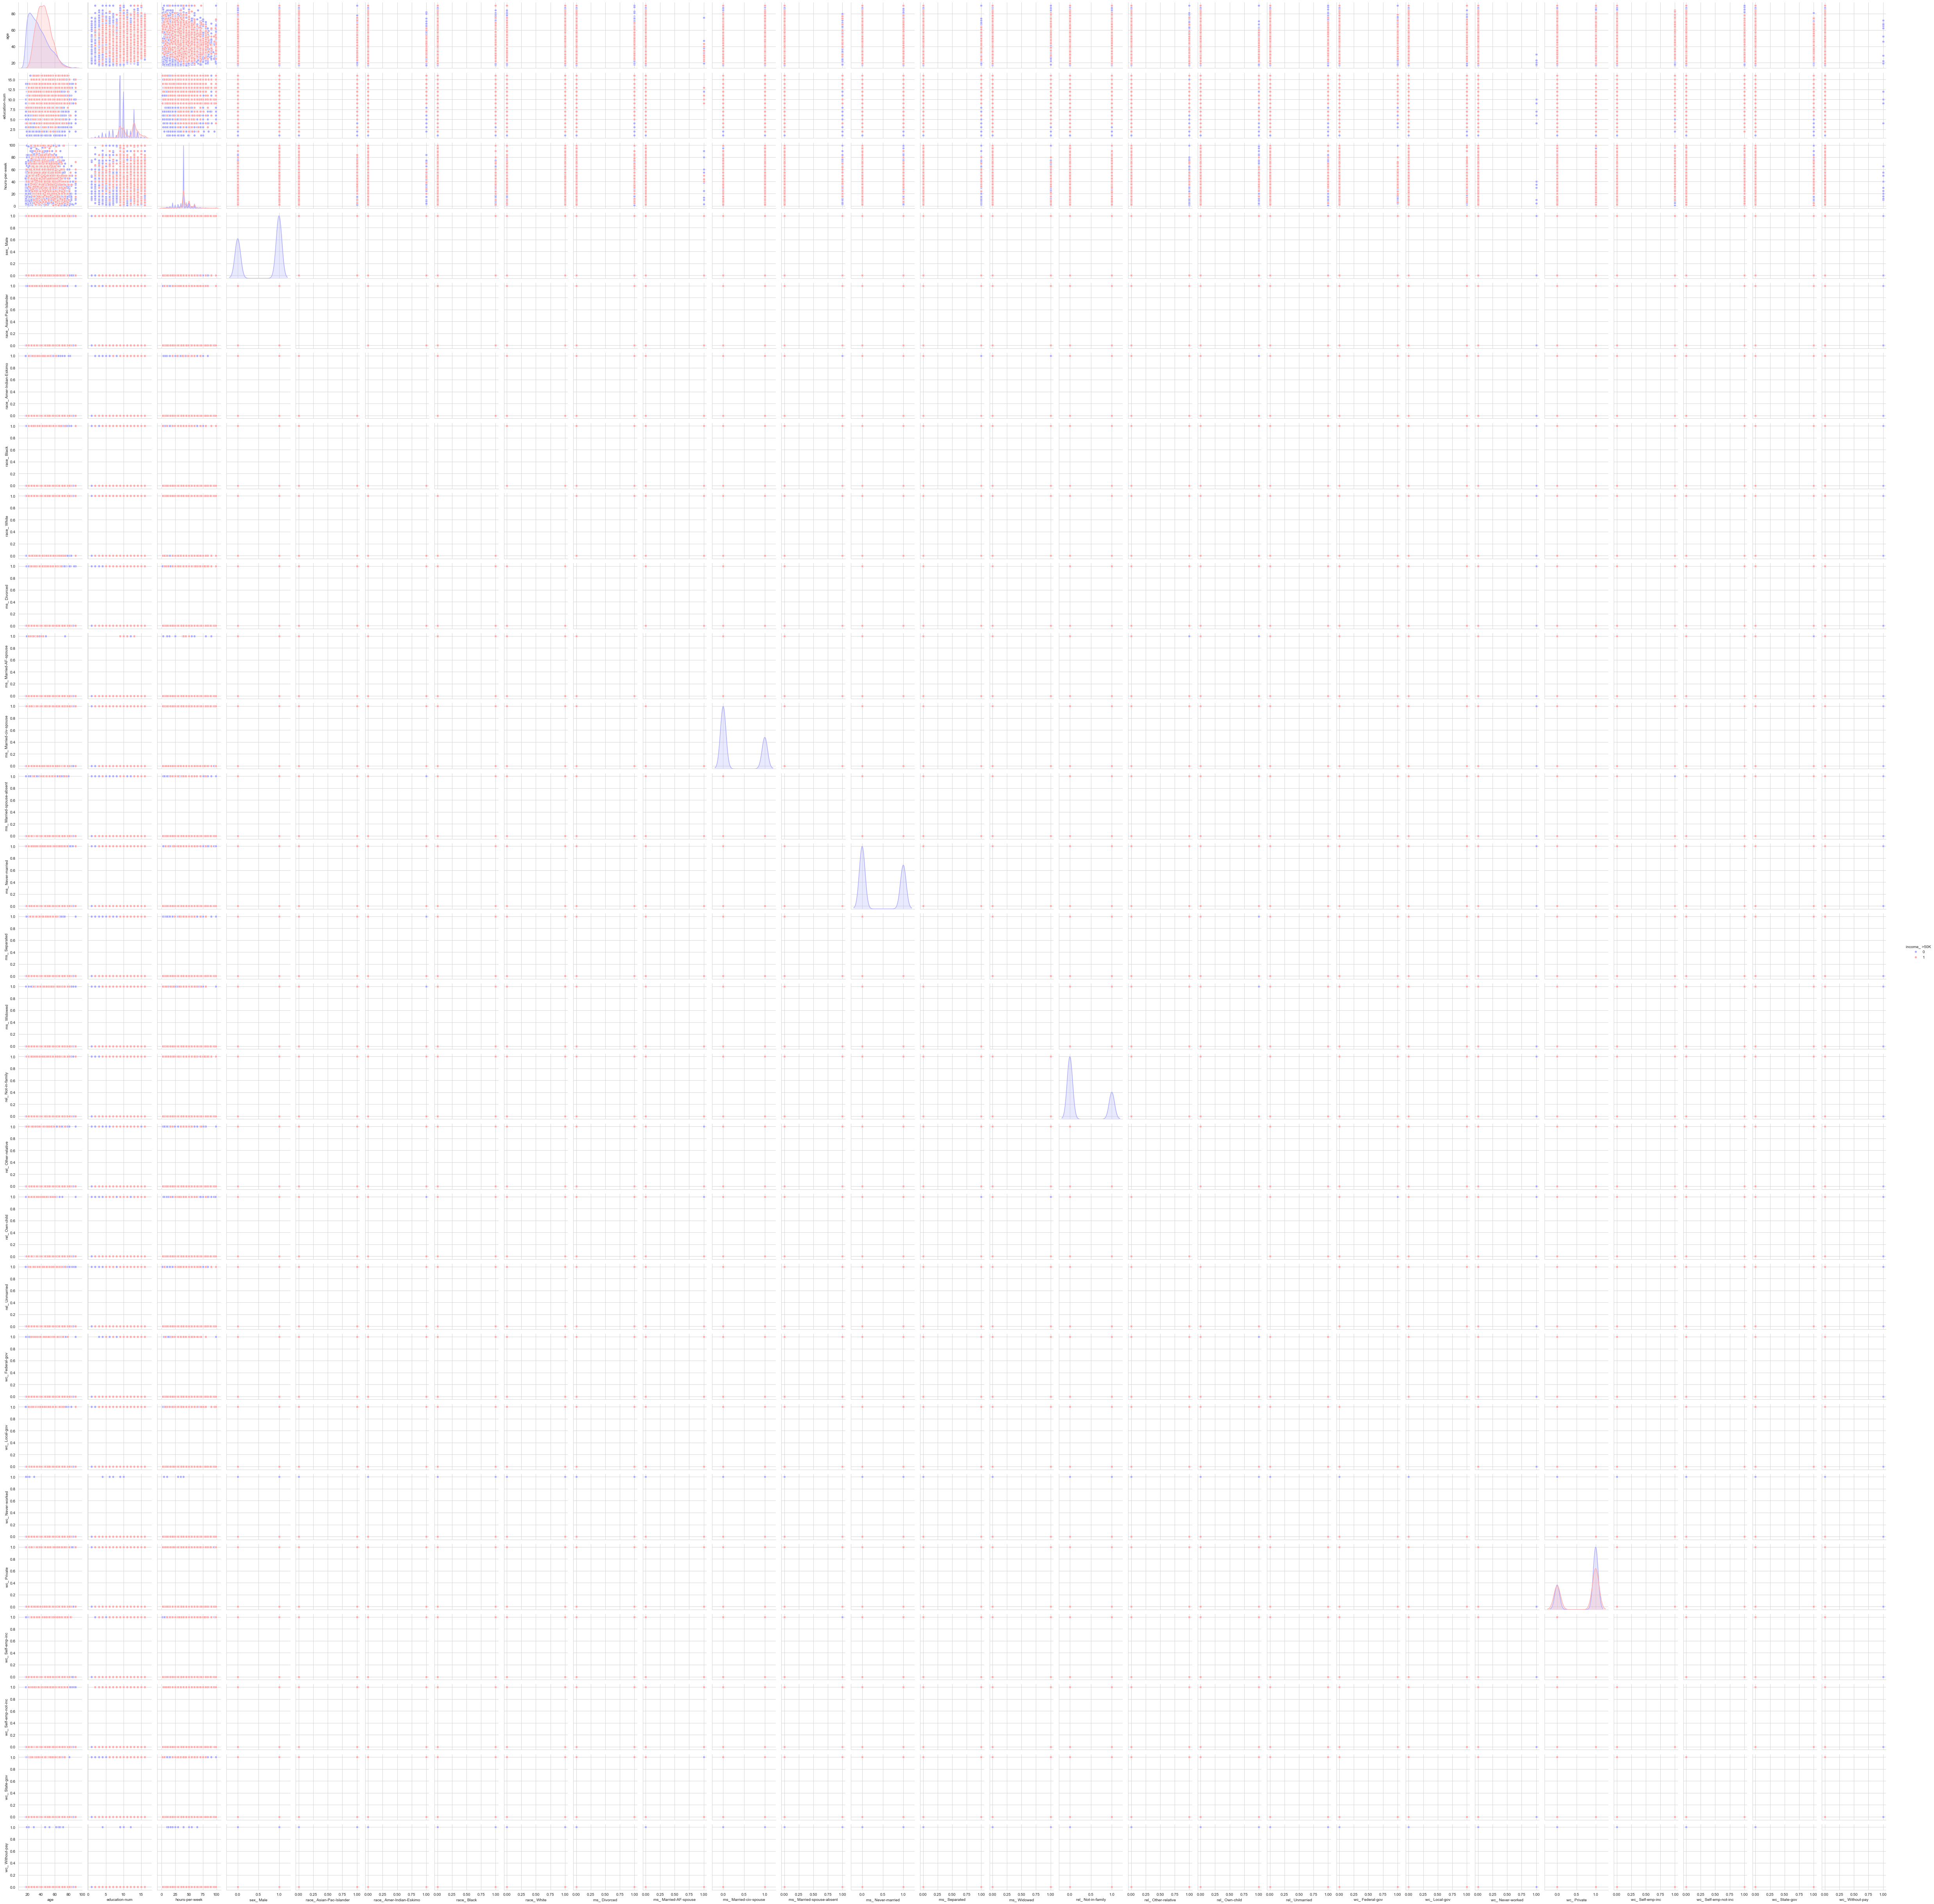

In [269]:
sns.pairplot(income_df,hue='income_ >50K',palette='bwr')

# The data preparation completed till the above step and the following steps will describe the model building and prediction

In [271]:
X = income_df[['age','education-num','hours-per-week','sex_ Male','race_ Asian-Pac-Islander','race_ Amer-Indian-Eskimo','race_ Black','race_ White','ms_ Divorced', 'ms_ Married-AF-spouse', 'ms_ Married-civ-spouse',
       'ms_ Married-spouse-absent', 'ms_ Never-married', 'ms_ Separated',
       'ms_ Widowed','rel_ Not-in-family', 'rel_ Other-relative', 'rel_ Own-child',
       'rel_ Unmarried', 'wc_ Federal-gov',
       'wc_ Local-gov', 'wc_ Never-worked', 'wc_ Private', 'wc_ Self-emp-inc',
       'wc_ Self-emp-not-inc', 'wc_ State-gov', 'wc_ Without-pay']]

y = income_df['income_ >50K']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [273]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [274]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
predictions = logmodel.predict(X_test)

In [276]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      8196
           1       0.68      0.49      0.57      2550

    accuracy                           0.82     10746
   macro avg       0.77      0.71      0.73     10746
weighted avg       0.81      0.82      0.81     10746



In [277]:
print('Accuracy: %.2f' % accuracy_score(y_test, predictions))

Accuracy: 0.82


#Trying to predict the same by using the cross validatoin 

In [279]:
predicted = model_selection.cross_val_predict(logmodel, X, y, cv=10)
metrics.accuracy_score(y, predicted) 

0.8234390835662295

In [280]:
accuracy = cross_val_score(logmodel, X, y, cv=10,scoring='accuracy')
print (accuracy)
print (cross_val_score(logmodel, X, y, cv=10,scoring='accuracy').mean())

[0.82100092 0.81726044 0.82555283 0.81173219 0.82186732 0.82125307
 0.82831695 0.83814496 0.8289312  0.8203317 ]
0.8234391584483693


# Trying to predict the same by using the KNN Classifier 

In [281]:
knn = KNeighborsClassifier(n_neighbors=5)

In [282]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8026242322724735

In [283]:
scores = cross_val_score(knn, X, y, cv=25, scoring='accuracy')
print(scores)

[0.79739064 0.80046048 0.79739064 0.80353031 0.80046048 0.81350729
 0.80966999 0.79355334 0.7904835  0.80660015 0.79508826 0.82488479
 0.80261137 0.81643625 0.80261137 0.80568356 0.80952381 0.81336406
 0.80952381 0.79877112 0.81336406 0.81029186 0.80414747 0.80107527
 0.80337942]


In [284]:
print(scores.mean())

0.804952131026946


# Trying to predict the same using test data file as follows

In [285]:
census_test_data = pd.read_csv("E:/DataScience/ThomsonReuters/adult_test.txt", header=None)
census_test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [286]:
census_test_data.columns = ["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation",
             "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

census_test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [287]:
income_dummies = pd.get_dummies(census_test_data.income, prefix='income')
income_dummies.drop(income_dummies.columns[0], axis=1, inplace=True)
census_test_data = pd.concat([census_test_data, income_dummies], axis=1)
census_test_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_ >50K.
9424,18,Self-emp-not-inc,58700,9th,5,Never-married,Farming-fishing,Other-relative,Other,Female,0,0,40,Mexico,<=50K.,0
14101,43,Self-emp-not-inc,297510,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K.,1
4216,35,?,171062,Bachelors,13,Never-married,?,Not-in-family,Black,Male,0,0,40,England,<=50K.,0
2141,52,Self-emp-not-inc,95082,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K.,0
6711,31,Private,187215,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,El-Salvador,<=50K.,0


In [288]:
sex_dummies = pd.get_dummies(census_test_data.sex, prefix='sex')
sex_dummies.drop(sex_dummies.columns[0], axis=1, inplace=True)
census_test_data = pd.concat([census_test_data, sex_dummies], axis=1)
census_test_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_ >50K.,sex_ Male
9424,18,Self-emp-not-inc,58700,9th,5,Never-married,Farming-fishing,Other-relative,Other,Female,0,0,40,Mexico,<=50K.,0,0
14101,43,Self-emp-not-inc,297510,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K.,1,1
4216,35,?,171062,Bachelors,13,Never-married,?,Not-in-family,Black,Male,0,0,40,England,<=50K.,0,1
2141,52,Self-emp-not-inc,95082,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K.,0,1
6711,31,Private,187215,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,El-Salvador,<=50K.,0,0


In [289]:
race_dummies = pd.get_dummies(census_test_data.race, prefix='race')
census_test_data = pd.concat([census_test_data, race_dummies], axis=1)
census_test_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,hours-per-week,native-country,income,income_ >50K.,sex_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
9424,18,Self-emp-not-inc,58700,9th,5,Never-married,Farming-fishing,Other-relative,Other,Female,...,40,Mexico,<=50K.,0,0,0,0,0,1,0
14101,43,Self-emp-not-inc,297510,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,60,United-States,>50K.,1,1,0,0,0,0,1
4216,35,?,171062,Bachelors,13,Never-married,?,Not-in-family,Black,Male,...,40,England,<=50K.,0,1,0,0,1,0,0
2141,52,Self-emp-not-inc,95082,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,60,United-States,<=50K.,0,1,0,0,0,0,1
6711,31,Private,187215,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,...,40,El-Salvador,<=50K.,0,0,0,0,0,0,1


In [290]:
marital_status_dummies = pd.get_dummies(census_test_data['marital-status'], prefix='ms')
census_test_data = pd.concat([census_test_data, marital_status_dummies], axis=1)
census_test_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,race_ Black,race_ Other,race_ White,ms_ Divorced,ms_ Married-AF-spouse,ms_ Married-civ-spouse,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed
9424,18,Self-emp-not-inc,58700,9th,5,Never-married,Farming-fishing,Other-relative,Other,Female,...,0,1,0,0,0,0,0,1,0,0
14101,43,Self-emp-not-inc,297510,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,1,0,0,1,0,0,0,0
4216,35,?,171062,Bachelors,13,Never-married,?,Not-in-family,Black,Male,...,1,0,0,0,0,0,0,1,0,0
2141,52,Self-emp-not-inc,95082,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,0,0,1,0,0,1,0,0,0,0
6711,31,Private,187215,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,...,0,0,1,0,0,0,0,1,0,0


In [291]:
relationship_dummies = pd.get_dummies(census_test_data['relationship'], prefix='rel')
census_test_data = pd.concat([census_test_data, relationship_dummies], axis=1)
census_test_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,ms_ Married-spouse-absent,ms_ Never-married,ms_ Separated,ms_ Widowed,rel_ Husband,rel_ Not-in-family,rel_ Other-relative,rel_ Own-child,rel_ Unmarried,rel_ Wife
9424,18,Self-emp-not-inc,58700,9th,5,Never-married,Farming-fishing,Other-relative,Other,Female,...,0,1,0,0,0,0,1,0,0,0
14101,43,Self-emp-not-inc,297510,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,0,0,1,0,0,0,0,0
4216,35,?,171062,Bachelors,13,Never-married,?,Not-in-family,Black,Male,...,0,1,0,0,0,1,0,0,0,0
2141,52,Self-emp-not-inc,95082,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,0,0,0,0,1,0,0,0,0,0
6711,31,Private,187215,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,...,0,1,0,0,0,1,0,0,0,0


In [292]:
workclass_dummies = pd.get_dummies(census_test_data['workclass'], prefix='wc')
census_test_data = pd.concat([census_test_data, workclass_dummies], axis=1)
census_test_data.sample(n=5, random_state=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,rel_ Wife,wc_ ?,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay
9424,18,Self-emp-not-inc,58700,9th,5,Never-married,Farming-fishing,Other-relative,Other,Female,...,0,0,0,0,0,0,0,1,0,0
14101,43,Self-emp-not-inc,297510,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
4216,35,?,171062,Bachelors,13,Never-married,?,Not-in-family,Black,Male,...,0,1,0,0,0,0,0,0,0,0
2141,52,Self-emp-not-inc,95082,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
6711,31,Private,187215,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,...,0,0,0,0,0,1,0,0,0,0


In [298]:
df_test = census_test_data.loc[:,~census_test_data.columns.duplicated()]
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,rel_ Wife,wc_ ?,wc_ Federal-gov,wc_ Local-gov,wc_ Never-worked,wc_ Private,wc_ Self-emp-inc,wc_ Self-emp-not-inc,wc_ State-gov,wc_ Without-pay
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,1,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,1,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,0,0,1,0,0,0,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,1,0,0,0,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,1,0,0,0,0,0,0,0,0


In [294]:
#missing_col_lst = ['ms_ Husband', 'ms_ Not-in-family', 'ms_ Other-relative', 'ms_ Own-child', 'ms_ Unmarried']

In [295]:
#for col in missing_col_lst:
    #df_test[col] = 0

In [299]:
df_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_ >50K.', 'sex_ Male', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'ms_ Divorced', 'ms_ Married-AF-spouse', 'ms_ Married-civ-spouse',
       'ms_ Married-spouse-absent', 'ms_ Never-married', 'ms_ Separated',
       'ms_ Widowed', 'rel_ Husband', 'rel_ Not-in-family',
       'rel_ Other-relative', 'rel_ Own-child', 'rel_ Unmarried', 'rel_ Wife',
       'wc_ ?', 'wc_ Federal-gov', 'wc_ Local-gov', 'wc_ Never-worked',
       'wc_ Private', 'wc_ Self-emp-inc', 'wc_ Self-emp-not-inc',
       'wc_ State-gov', 'wc_ Without-pay'],
      dtype='object')

In [301]:
X_test_data = df_test[['age','education-num','hours-per-week','sex_ Male','race_ Asian-Pac-Islander','race_ Amer-Indian-Eskimo','race_ Black','race_ White','ms_ Divorced', 'ms_ Married-AF-spouse', 'ms_ Married-civ-spouse',
       'ms_ Married-spouse-absent', 'ms_ Never-married', 'ms_ Separated',
       'ms_ Widowed','rel_ Not-in-family', 'rel_ Other-relative', 'rel_ Own-child',
       'rel_ Unmarried', 'wc_ Federal-gov',
       'wc_ Local-gov', 'wc_ Never-worked', 'wc_ Private', 'wc_ Self-emp-inc',
       'wc_ Self-emp-not-inc', 'wc_ State-gov', 'wc_ Without-pay']]

y_test_data = df_test['income_ >50K.']

In [302]:
pred_test_data = logmodel.predict(X_test_data)

In [303]:
print(classification_report(y_test_data,pred_test_data))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12435
           1       0.68      0.50      0.58      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.71      0.73     16281
weighted avg       0.82      0.83      0.82     16281



In [304]:
print('Accuracy: %.2f' % accuracy_score(y_test_data, pred_test_data))

Accuracy: 0.83
